In [6]:
import requests
r = requests.get('http://www.script-o-rama.com/movie_scripts/s/scarface-script-transcript-al-pacino.html')

from bs4 import BeautifulSoup

bs = BeautifulSoup(r.text)
bs1 = bs.get_text().strip()
bs2 = bs1.replace('\n', '')

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
stop_words = set(stopwords.words('english'))
swl = list(stop_words)
for i in range(0,len(swl)):
  swl.append(swl[i].upper())

punct = []
for i in range(0,len(string.punctuation)):
  punct.append(string.punctuation[i])

palavrascomuns = []

word_tokens = nltk.word_tokenize(bs2)
for w in word_tokens:
  if (w not in swl) & (w not in punct):
    palavrascomuns.append(w)


In [9]:
for i in range(0,len(palavrascomuns)):
  if palavrascomuns[i] == "n't":
    palavrascomuns[i] = None
  elif (palavrascomuns[i] == 'ca') or (palavrascomuns[i] == "ca n't"):
    palavrascomuns[i] = "can't"
  elif (palavrascomuns[i] == 'wo') or (palavrascomuns[i] == "wo n't"):
    palavrascomuns[i] = "won't"
  elif palavrascomuns[i] == 'll':
    palavrascomuns[i] = None
  elif palavrascomuns[i] == "should n't":
    palavrascomuns[i] = "shouldn't"
  elif palavrascomuns[i] == "n't worry":
    palavrascomuns[i] = "worry"
  elif (palavrascomuns[i] == "re") or (palavrascomuns[i] == "'re"):
    palavrascomuns[i] = None
  elif palavrascomuns[i] == "ve":
    palavrascomuns[i] = None
  elif palavrascomuns[i] == "gon":
    palavrascomuns[i] = 'gonna'
  elif palavrascomuns[i] == "na":
    palavrascomuns[i] = None
  elif palavrascomuns[i] == "ta":
    palavrascomuns[i] = None
  elif palavrascomuns[i] in swl:
    palavrascomuns.remove(palavrascomuns[i])
  else:
    pass

fdist1 = nltk.FreqDist(palavrascomuns)
d1 = dict(fdist1)
fd1 = pd.DataFrame.from_dict(d1,orient='index')
from PIL import Image
from io import BytesIO
import re
import os

r2 = requests.get('https://c1.staticflickr.com/7/6141/5999807352_432d4ecc00_z.jpg')
img = Image.open(BytesIO(r2.content))
mask1 = np.array(img)
blackred = ['black','red']
cmap = LinearSegmentedColormap.from_list('Black Red', blackred , N=2, gamma=1.0)
birch = 'https://raw.githubusercontent.com/gmkhussain/fonts/master/FONTS/Birch%20Std.otf'
birch_file = 'Birch%20Std.otf'
r3 = requests.get(birch)
open('birch_font.otf','wb').write(r3.content)

lista1 = []
for w in palavrascomuns:
  if (w not in swl) & (w not in punct) & (type(w) == str):
    lista1.append(w)


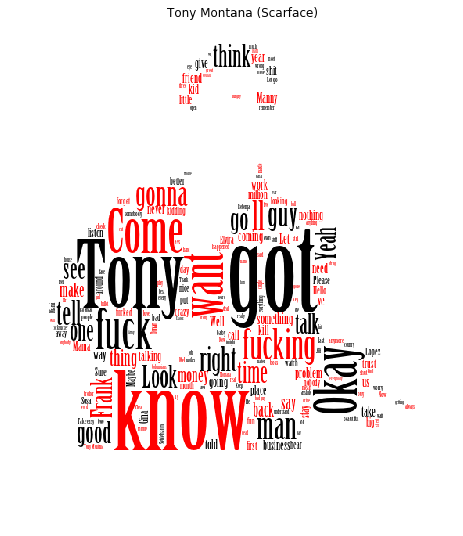

In [10]:
plt.figure(figsize=(12.0,9.0))
wc1 = WordCloud(background_color="white",width = 1000, height = 500,colormap=cmap,mask=mask1,font_path='birch_font.otf').generate(" ".join(lista1))
plt.imshow(wc1)
plt.axis('off')
plt.title('Tony Montana (Scarface)')
plt.show()